In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

cifar10 = keras.datasets.cifar10
(train_images,train_labels),(test_images,test_labels)=cifar10.load_data()
print(train_images.shape)

(50000, 32, 32, 3)


In [12]:
print(train_images)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [4]:
train_images,test_images =train_images/255.0,test_images/255.0
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def show():
    plt.figure(figsize=(10,10),dpi=400)
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.ylabel([])
        plt.grid(False)
        plt.imshow(train_images[i],cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

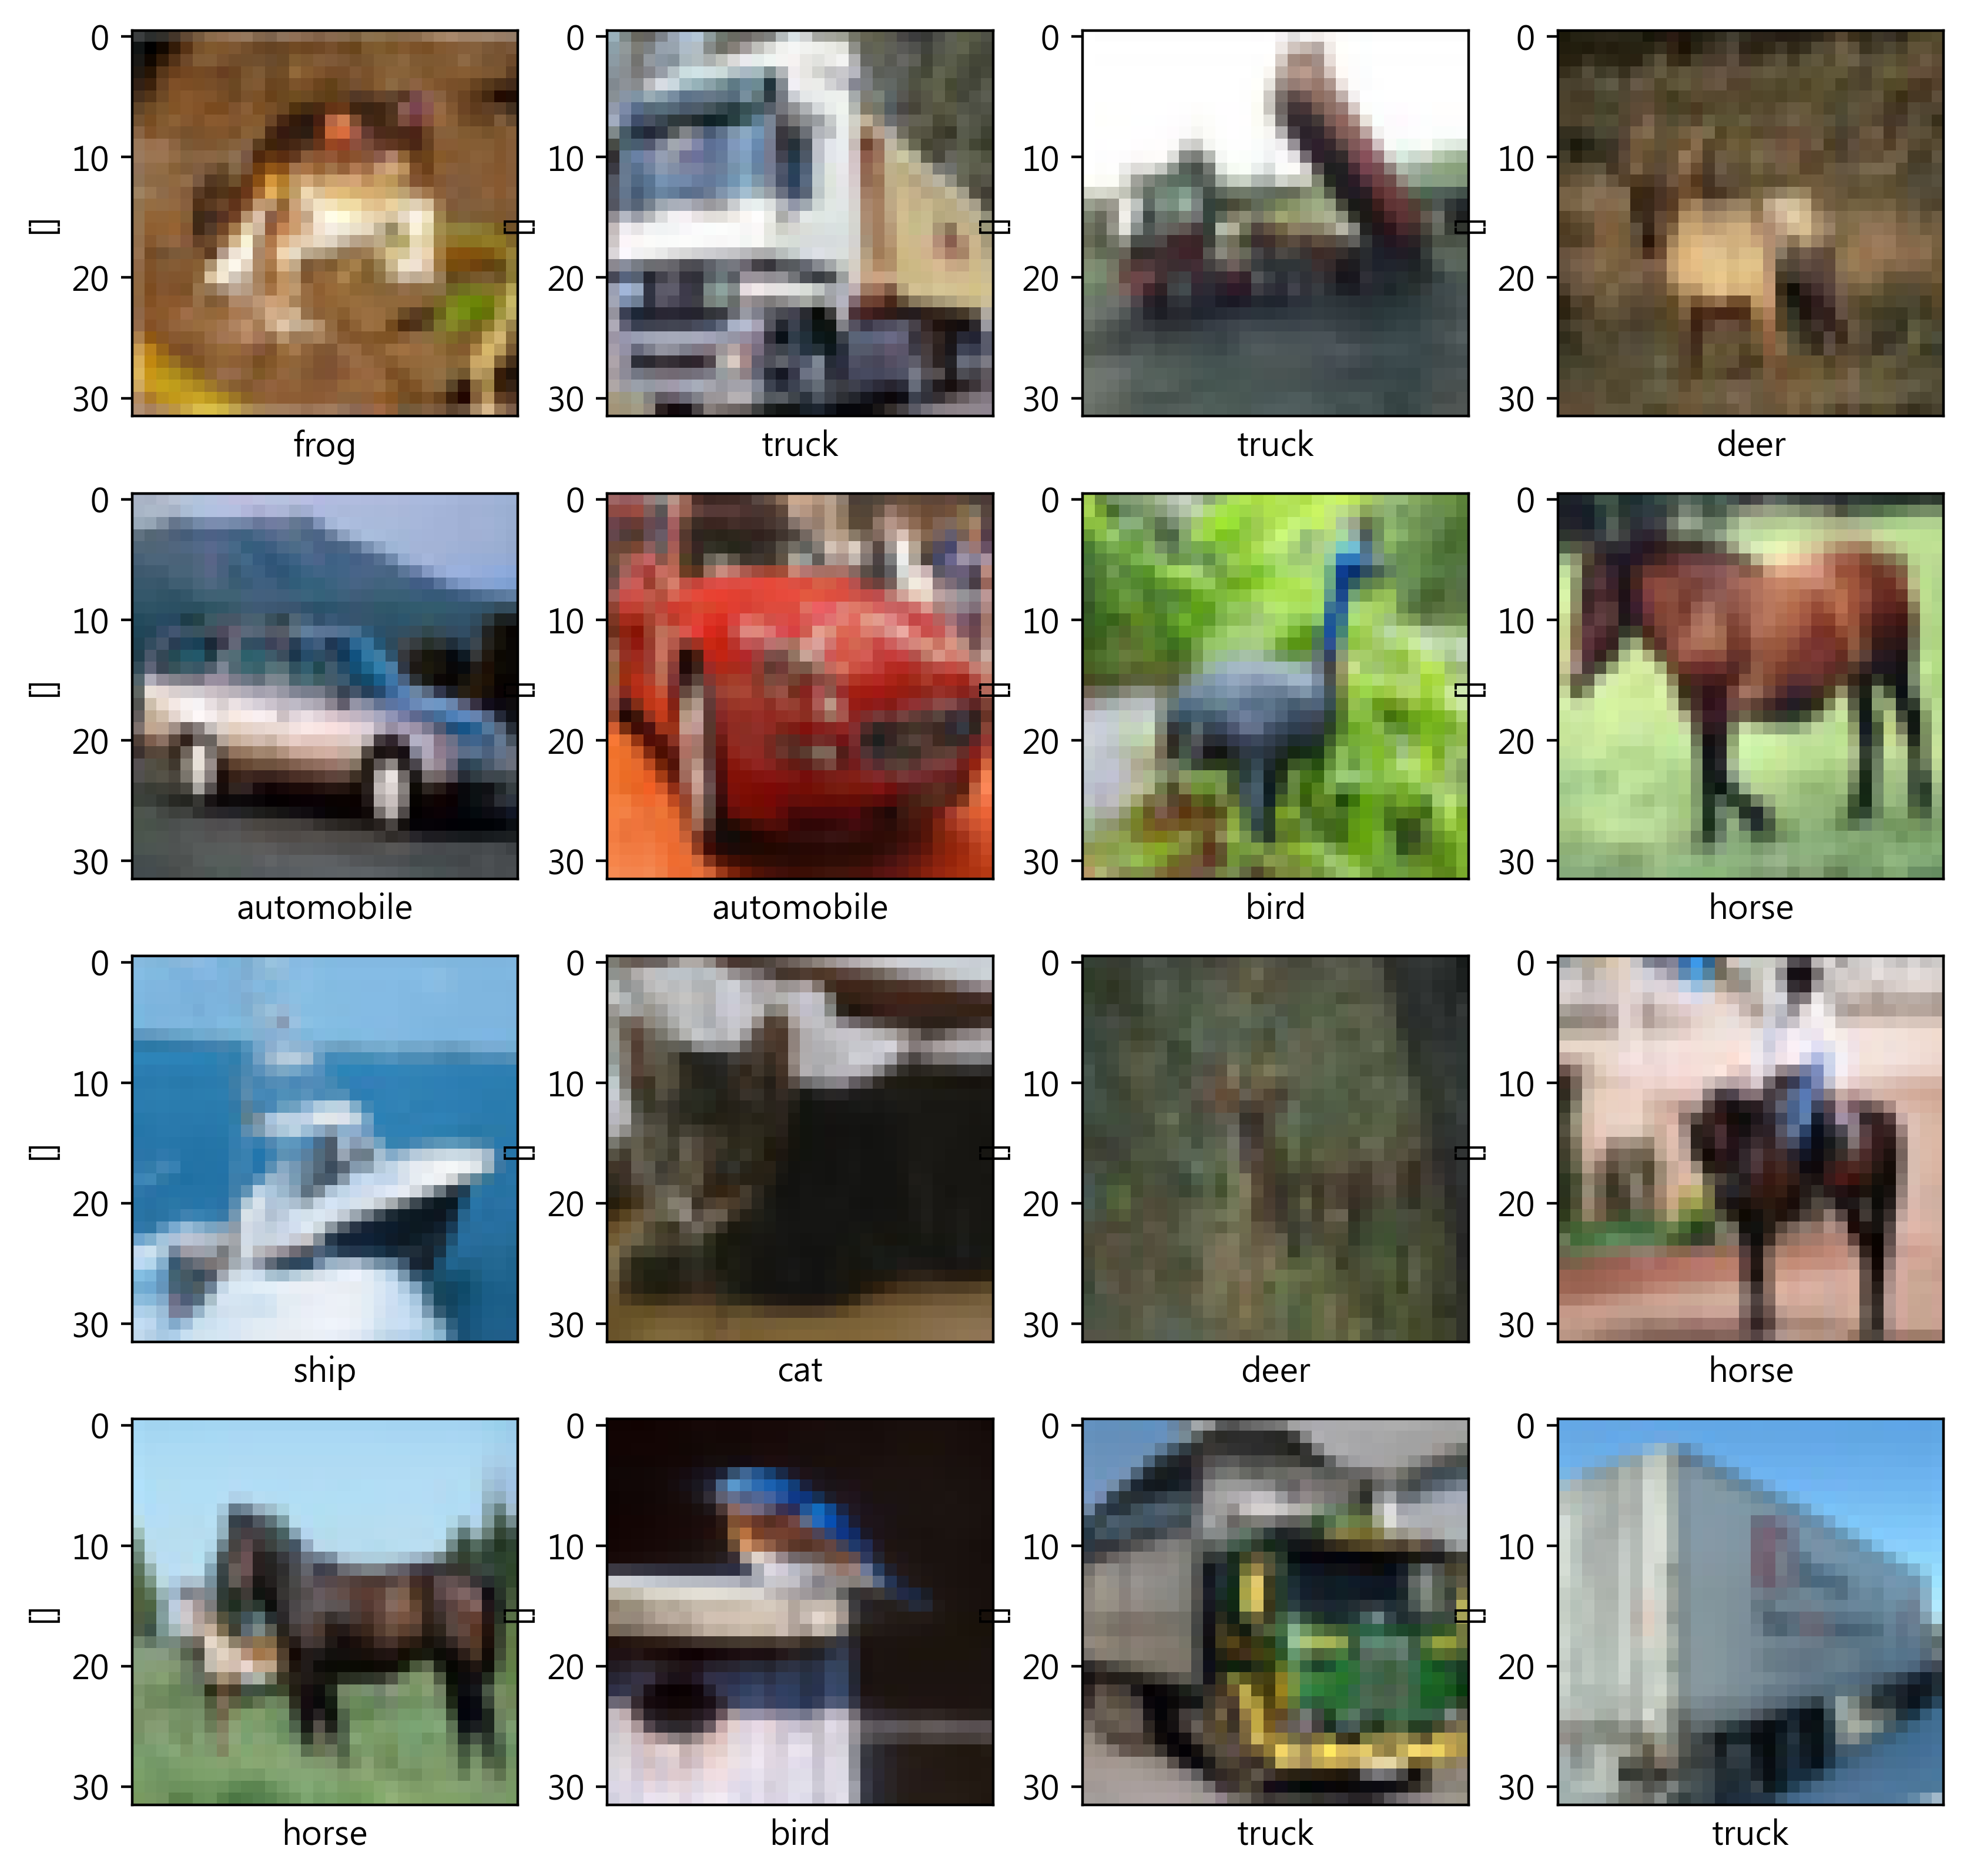

In [13]:
show()

In [17]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),strides=(1,1,),padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32,3,strides=(1,1,),padding='valid',activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [18]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics=['accuracy']
model.compile(optimizer=optim,loss=loss,metrics=metrics)

In [19]:
batch_size=64
epochs=5
model.fit(train_images,train_labels,epochs=epochs,batch_size=batch_size,verbose=2)

Epoch 1/5
782/782 - 15s - loss: 1.5861 - accuracy: 0.4315 - 15s/epoch - 19ms/step
Epoch 2/5
782/782 - 15s - loss: 1.2496 - accuracy: 0.5584 - 15s/epoch - 19ms/step
Epoch 3/5
782/782 - 17s - loss: 1.1169 - accuracy: 0.6110 - 17s/epoch - 21ms/step
Epoch 4/5
782/782 - 16s - loss: 1.0164 - accuracy: 0.6467 - 16s/epoch - 20ms/step
Epoch 5/5
782/782 - 17s - loss: 0.9488 - accuracy: 0.6718 - 17s/epoch - 22ms/step


In [20]:
model.evaluate(test_images,test_labels,batch_size=batch_size,verbose=2)

157/157 - 1s - loss: 0.9671 - accuracy: 0.6639 - 998ms/epoch - 6ms/step


[0.9670577049255371, 0.6639000177383423]